In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
# loading the dataset
df = pd.read_csv('Applicant-details.csv')
df.head()

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,no,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,no,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,single,owned,no,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,Asansol,West_Bengal,9,13,0


In [3]:
df['Residence_City'].unique()

array(['Jalandhar', 'Bally', 'Indore', 'Kurnool[18]', 'Asansol',
       'Bongaigaon', 'Katihar', 'Sikar', 'Chinsurah', 'Muzaffarnagar',
       'Darbhanga', 'Chandigarh_city', 'Adoni', 'Ludhiana', 'Amroha',
       'Aligarh', 'Udupi', 'Delhi_city', 'Moradabad', 'Sonipat',
       'Gandhinagar', 'Raebareli', 'Madhyamgram', 'Nashik', 'Bilaspur',
       'Davanagere', 'Kakinada', 'Chandrapur', 'Sangli-Miraj_&_Kupwad',
       'Dhule', 'Bhind', 'Kollam', 'Durg', 'Ajmer', 'Malegaon',
       'Kottayam', 'Bhalswa_Jahangir_Pur', 'Gaya', 'Guna', 'Hapur',
       'Agartala', 'Thiruvananthapuram', 'Kharagpur', 'Rewa', 'Jorhat',
       'Ambattur', 'Sambhal', 'Etawah', 'Bellary', 'New_Delhi',
       'South_Dumdum', 'Gangtok', 'Aizawl', 'Pimpri-Chinchwad',
       'Nangloi_Jat', 'Anantapuram[24]', 'Mangalore', 'Hazaribagh',
       'Kumbakonam', 'Jhansi', 'Proddatur', 'Avadi', 'Bhagalpur',
       'Madanapalle', 'Meerut', 'Tiruppur', 'Jehanabad[38]',
       'Machilipatnam', 'Howrah', 'Jamshedpur', 'Kolkata',

In [4]:
# let's drop the 'ID' column as it is always not used in modelling
df.drop('Applicant_ID',axis=1,inplace=True)

In [5]:
# Overall information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Annual_Income                100000 non-null  int64 
 1   Applicant_Age                100000 non-null  int64 
 2   Work_Experience              100000 non-null  int64 
 3   Marital_Status               100000 non-null  object
 4   House_Ownership              100000 non-null  object
 5   Vehicle_Ownership(car)       100000 non-null  object
 6   Occupation                   100000 non-null  object
 7   Residence_City               100000 non-null  object
 8   Residence_State              100000 non-null  object
 9   Years_in_Current_Employment  100000 non-null  int64 
 10  Years_in_Current_Residence   100000 non-null  int64 
 11  Loan_Default_Risk            100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


In [6]:
df['Loan_Default_Risk'].value_counts()

0    87003
1    12997
Name: Loan_Default_Risk, dtype: int64

In [7]:
#check and remove duplicates
df.duplicated().sum()

92822

In [8]:
df.drop_duplicates(inplace=True)

## EDA and Data Preprocessing

In [9]:
df.columns

Index(['Annual_Income', 'Applicant_Age', 'Work_Experience', 'Marital_Status',
       'House_Ownership', 'Vehicle_Ownership(car)', 'Occupation',
       'Residence_City', 'Residence_State', 'Years_in_Current_Employment',
       'Years_in_Current_Residence', 'Loan_Default_Risk'],
      dtype='object')

In [10]:
# statistical information of the data
df.describe()

,Annual_Income,Applicant_Age,Work_Experience,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
count,7.178000e+03,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000
mean,4.994875e+06,49.999582,10.067986,6.354416,11.991920,0.164809
std,2.885524e+06,17.059661,5.984407,3.651961,1.396144,0.371034
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.485976e+06,35.000000,5.000000,4.000000,11.000000,0.000000
50%,4.997104e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.491472e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999180e+06,79.000000,20.000000,14.000000,14.000000,1.000000


## Let's do some exploration and cleaning of cat. columns
### 'Marital_status'

In [11]:
def clean_marital(x):
    if x == 'single':
        return 'Single'
    if x == 'married':
        return 'Married'
df['Marital_Status'] = df['Marital_Status'].apply(clean_marital)

In [12]:
df['Marital_Status'].value_counts()

Single     6445
Married     733
Name: Marital_Status, dtype: int64

<Axes: xlabel='Marital_Status', ylabel='count'>

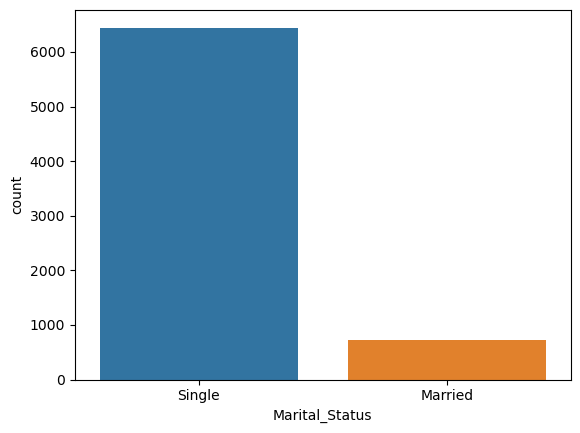

In [13]:
sns.countplot(x=df['Marital_Status'])

### 'Loan_Default_Risk'

In [14]:
df['Loan_Default_Risk'].value_counts()

0    5995
1    1183
Name: Loan_Default_Risk, dtype: int64

<Axes: xlabel='Loan_Default_Risk', ylabel='count'>

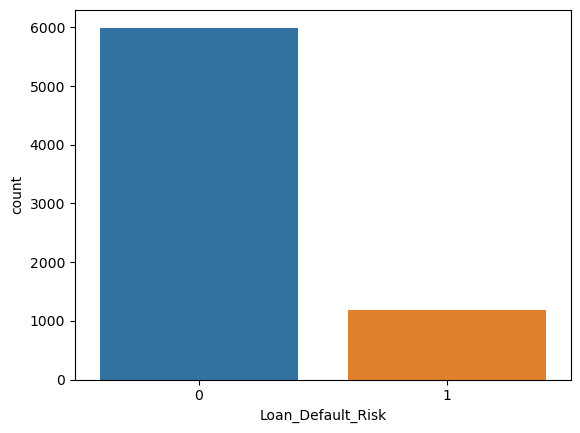

In [15]:
sns.countplot(x=df['Loan_Default_Risk'])

### 'House_Ownership'

In [16]:
def clean_house(x):
    if x == 'rented':
        return 'Rented'
    if x == 'owned':
        return 'Owned'
    if x == 'norent_noown':
        return 'None'
df['House_Ownership'] = df['House_Ownership'].apply(clean_house)

In [17]:
df['House_Ownership'].value_counts()

Rented    6622
Owned      363
None       193
Name: House_Ownership, dtype: int64

<Axes: xlabel='House_Ownership', ylabel='count'>

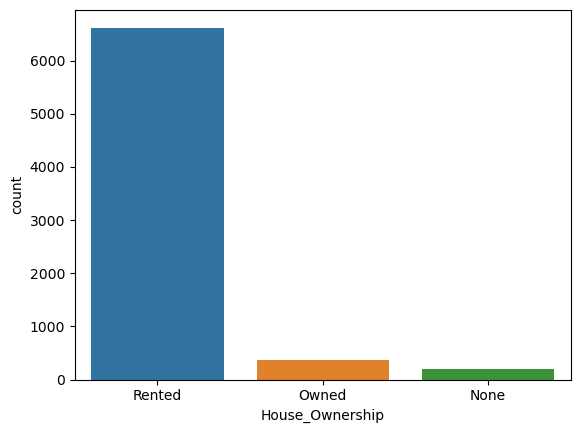

In [18]:
sns.countplot(x=df['House_Ownership'])

### 'Vehicle_Ownership(car)'

In [19]:
def clean_vehicle(x):
    if x == 'no':
        return 'No'
    if x == 'yes':
        return 'Yes'
df['Vehicle_Ownership(car)'] = df['Vehicle_Ownership(car)'].apply(clean_vehicle)

In [20]:
df['Vehicle_Ownership(car)'].value_counts()

No     4987
Yes    2191
Name: Vehicle_Ownership(car), dtype: int64

<Axes: xlabel='Vehicle_Ownership(car)', ylabel='count'>

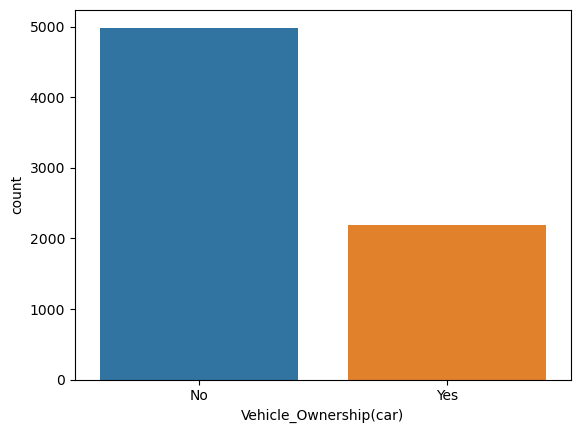

In [21]:
sns.countplot(x=df['Vehicle_Ownership(car)'])

### 'Occupation'

In [22]:
df['Occupation'].value_counts()

Physician                     170
Statistician                  166
Computer_hardware_engineer    157
Fashion_Designer              155
Web_designer                  155
Magistrate                    155
Technical_writer              155
Air_traffic_controller        155
Psychologist                  154
Mechanical_engineer           151
Comedian                      151
Software_Developer            151
Police_officer                150
Drafter                       150
Hotel_Manager                 150
Chemical_engineer             149
Biomedical_Engineer           149
Secretary                     148
Flight_attendant              148
Financial_Analyst             147
Graphic_Designer              146
Industrial_Engineer           144
Computer_operator             143
Scientist                     142
Politician                    140
Technician                    139
Microbiologist                139
Surveyor                      139
Lawyer                        138
Aviator       

### 'Residence_City'

In [23]:
df['Residence_City'].value_counts()

Vijayanagaram       38
Vijayawada          37
Indore              36
Srinagar            36
Bhopal              36
                    ..
Loni                12
Tadipatri           12
Katni               10
Warangal[11][12]    10
Karaikudi            9
Name: Residence_City, Length: 317, dtype: int64

### 'Residence_State'

In [24]:
df['Residence_State'].value_counts()

Uttar_Pradesh        790
Maharashtra          737
Andhra_Pradesh       734
West_Bengal          666
Bihar                568
Tamil_Nadu           466
Madhya_Pradesh       414
Karnataka            329
Gujarat              322
Rajasthan            265
Jharkhand            257
Haryana              219
Telangana            211
Assam                206
Kerala               171
Delhi                155
Odisha               133
Punjab               128
Chhattisgarh         111
Jammu_and_Kashmir     53
Uttarakhand           50
Puducherry            41
Manipur               28
Mizoram               25
Tripura               25
Himachal_Pradesh      24
Uttar_Pradesh[5]      20
Chandigarh            17
Sikkim                13
Name: Residence_State, dtype: int64

In [25]:
df.head()

,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,9657655,76,0,Single,Rented,No,Psychologist,Jalandhar,Punjab,0,12,0
1,9259353,37,18,Single,Rented,No,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,1509721,66,8,Single,Rented,No,Drafter,Indore,Madhya_Pradesh,4,12,0
3,5867312,43,1,Single,Owned,No,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,7223191,44,9,Single,Rented,No,Air_traffic_controller,Asansol,West_Bengal,9,13,0


### Let's come back to numerical cols. and check their distributions and even outliers if possible

### 'Applicant_Age'

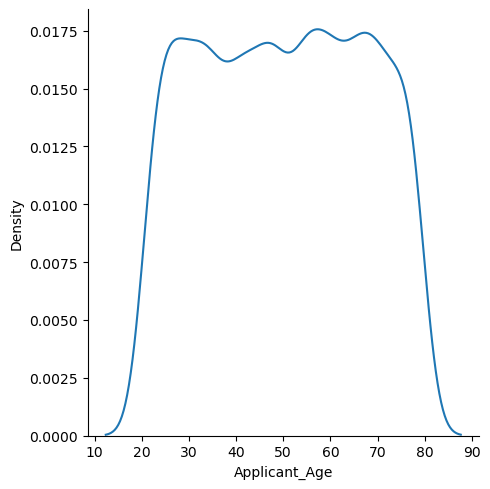

In [26]:
sns.displot(x=df['Applicant_Age'],kind='kde')

<Axes: xlabel='Applicant_Age'>

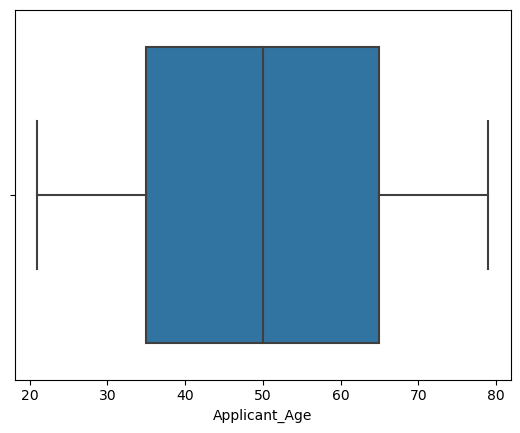

In [27]:
sns.boxplot(x=df['Applicant_Age'])

### 'Work_Experience'

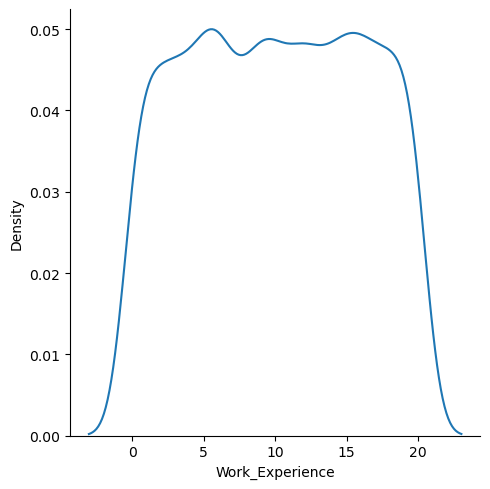

In [28]:
sns.displot(x=df['Work_Experience'],kind='kde')

<Axes: xlabel='Work_Experience'>

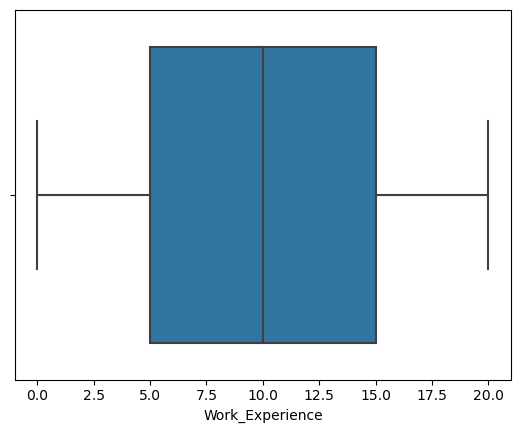

In [29]:
sns.boxplot(x=df['Work_Experience'])

### 'Annual_Income'

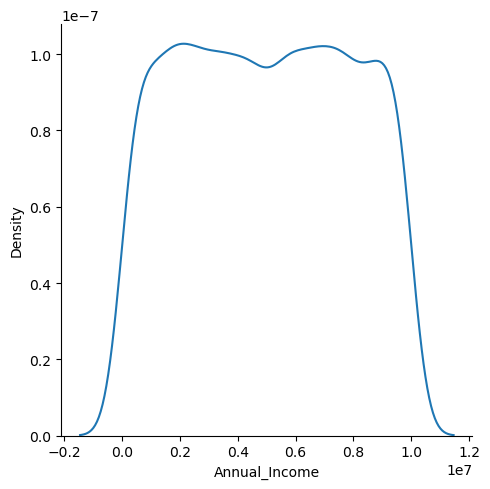

In [30]:
sns.displot(x=df['Annual_Income'],kind='kde')

<Axes: xlabel='Annual_Income'>

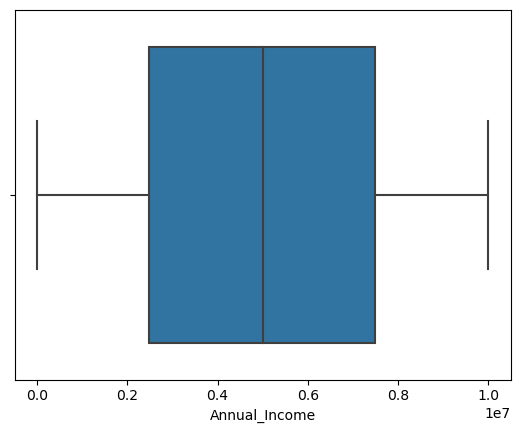

In [31]:
sns.boxplot(x=df['Annual_Income'])

In [32]:
def shorten_cat(x,cut_off):
    cat_map = {}
    for i in range(len(x)):
        if x.values[i] >= cut_off:
            cat_map[x.index[i]] = x.index[i]
        else:
            cat_map[x.index[i]] = 'Other'
    return cat_map

In [33]:
df['Residence_City'] = df['Residence_City'].map(shorten_cat(df['Residence_City'].value_counts(),20))
df['Residence_State'] = df['Residence_State'].map(shorten_cat(df['Residence_State'].value_counts(),100))

In [34]:
df = df[df['Residence_City'] != 'Other']

In [35]:
df = df[df['Residence_State'] != 'Other']

In [36]:
df['Residence_State'].unique()

array(['Punjab', 'Madhya_Pradesh', 'Andhra_Pradesh', 'Assam', 'Bihar',
       'Rajasthan', 'West_Bengal', 'Uttar_Pradesh', 'Karnataka',
       'Haryana', 'Maharashtra', 'Chhattisgarh', 'Kerala', 'Delhi',
       'Tamil_Nadu', 'Jharkhand', 'Gujarat', 'Odisha', 'Telangana'],
      dtype=object)

In [37]:
df['Residence_City'].unique()

array(['Jalandhar', 'Indore', 'Kurnool[18]', 'Bongaigaon', 'Katihar',
       'Sikar', 'Chinsurah', 'Muzaffarnagar', 'Darbhanga', 'Adoni',
       'Ludhiana', 'Amroha', 'Aligarh', 'Udupi', 'Sonipat', 'Raebareli',
       'Nashik', 'Bilaspur', 'Davanagere', 'Kakinada', 'Dhule', 'Bhind',
       'Kollam', 'Durg', 'Ajmer', 'Malegaon', 'Kottayam',
       'Bhalswa_Jahangir_Pur', 'Guna', 'Hapur', 'Thiruvananthapuram',
       'Rewa', 'Jorhat', 'Ambattur', 'Sambhal', 'Bellary', 'New_Delhi',
       'South_Dumdum', 'Pimpri-Chinchwad', 'Nangloi_Jat',
       'Anantapuram[24]', 'Mangalore', 'Hazaribagh', 'Kumbakonam',
       'Jhansi', 'Proddatur', 'Bhagalpur', 'Madanapalle', 'Tiruppur',
       'Jehanabad[38]', 'Machilipatnam', 'Howrah', 'Kolkata', 'Phagwara',
       'Bhusawal', 'Giridih', 'Bhopal', 'Jalgaon', 'Deoghar', 'Jamnagar',
       'Navi_Mumbai', 'Akola', 'Bhatpara', 'North_Dumdum', 'Ichalkaranji',
       'Tirupati[21][22]', 'Surendranagar_Dudhrej', 'Junagadh',
       'Thrissur', 'Jaipur', 'Arra

### Convert cat to num...

In [38]:
df['House_Ownership'].value_counts()

Rented    4963
Owned      292
None       146
Name: House_Ownership, dtype: int64

In [39]:
df['Marital_Status'] = df['Marital_Status'].map({'Single':1,'Married':0})
df['House_Ownership'] = df['House_Ownership'].map({'Rented':2,'Owned':1,'None':0})
df['Vehicle_Ownership(car)'] = df['Vehicle_Ownership(car)'].map({'No':1,'Yes':0})

In [40]:
df.shape

(5401, 12)

In [41]:
df.head()

,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,9657655,76,0,1,2,1,Psychologist,Jalandhar,Punjab,0,12,0
2,1509721,66,8,1,2,1,Drafter,Indore,Madhya_Pradesh,4,12,0
3,5867312,43,1,1,1,1,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
5,1161425,45,14,1,2,1,Biomedical_Engineer,Bongaigaon,Assam,13,13,0
6,7059529,63,8,1,2,0,Fashion_Designer,Katihar,Bihar,8,13,1


In [42]:
le_occ = LabelEncoder()
le_res_city = LabelEncoder()
le_res_state = LabelEncoder()
df['Occupation'] = le_occ.fit_transform(df['Occupation'])
df['Residence_City'] = le_res_city.fit_transform(df['Residence_City'])
df['Residence_State'] = le_res_state.fit_transform(df['Residence_State'])

In [43]:
df.head(2)

,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,9657655,76,0,1,2,1,40,85,13,0,12,0
2,1509721,66,8,1,2,1,19,82,10,4,12,0


In [44]:
X = df.drop('Loan_Default_Risk',axis = 1)
y = df['Loan_Default_Risk']

### Performing feature selection

In [45]:
from sklearn.feature_selection import f_classif,SelectKBest
fs = SelectKBest(score_func = f_classif,k = 'all')
fs.fit(X,y)

SelectKBest(k='all')

In [46]:
features = pd.DataFrame(X.columns)
scores = pd.DataFrame(fs.scores_)
feature_score = pd.concat([features,scores],axis = 1)
feature_score.columns = ['feature','score']
print(feature_score)

                        feature     score
0                 Annual_Income  0.057641
1                 Applicant_Age  0.011447
2               Work_Experience  2.598998
3                Marital_Status  0.185108
4               House_Ownership  1.258063
5        Vehicle_Ownership(car)  1.836835
6                    Occupation  0.051881
7                Residence_City  0.165800
8               Residence_State  0.711195
9   Years_in_Current_Employment  0.022118
10   Years_in_Current_Residence  0.542657


In [47]:
X = X[['Work_Experience','House_Ownership','Vehicle_Ownership(car)','Residence_State','Years_in_Current_Residence']]

In [48]:
X

,Work_Experience,House_Ownership,Vehicle_Ownership(car),Residence_State,Years_in_Current_Residence
0,0,2,1,13,12
2,8,2,1,10,12
3,1,1,1,0,13
5,14,2,1,1,13
6,8,2,0,2,13
...,...,...,...,...,...
93925,1,2,1,18,12
94692,15,2,1,2,14
95685,7,2,1,1,13
96575,2,2,1,17,10


In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

### Scaling the data

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Building 3 models and picking the best

In [51]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
model1 = LogisticRegression()
model1.fit(X_train,y_train)
prediction = model1.predict(X_test)
model2 = SVC()
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)

In [52]:
print(f"RandomForest's score; {accuracy_score(y_test,pred)}")
print(f"SVC's score; {accuracy_score(y_test,y_pred)}")
print(f"Logistic Regression's score; {accuracy_score(y_test,prediction)}")

RandomForest's score; 0.7452190006169032
SVC's score; 0.8396051819864281
Logistic Regression's score; 0.8396051819864281


In [54]:
import pickle
data = {'model':model1,'le_res_state':le_res_state}
with open('Loan.pkl','wb') as file:
    pickle.dump(data,file)